In [54]:
import numpy as np
import matplotlib.pyplot as plt

class LinearRegression:
    def __init__(self, degree=1, reg_type=None, lambda_=0.0, learning_rate=0.01, n_iterations=1000):
        self.degree = degree
        self.reg_type = reg_type
        self.lambda_ = lambda_
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.coefficients = None

    def fit(self, X, y):
        # Generate polynomial features
        X_poly = self._polynomial_features(X)
        # Add intercept term
        X_poly = np.hstack([np.ones((X_poly.shape[0], 1)), X_poly])
        
        # Initialize coefficients
        self.coefficients = np.zeros(X_poly.shape[1])
        
        # Gradient Descent
        for iteration in range(self.n_iterations):
            predictions = X_poly @ self.coefficients
            errors = predictions - y
            gradient = (X_poly.T @ errors) / X_poly.shape[0]
            
            # Regularization
            if self.reg_type == 'L2':
                gradient[1:] += (self.lambda_ / X_poly.shape[0]) * self.coefficients[1:]  # Regularize coefficients (excluding intercept)
            elif self.reg_type == 'L1':
                # L1 regularization (LASSO)
                gradient[1:] += (self.lambda_ / X_poly.shape[0]) * np.sign(self.coefficients[1:])
            
            self.coefficients -= self.learning_rate * gradient

            # Save the model at every iteration for visualization 
            if (iteration+1)%100==0 :
                self.save_plot(X, y, iteration)
    
    def predict(self, X):
        X_poly = self._polynomial_features(X)
        X_poly = np.hstack([np.ones((X_poly.shape[0], 1)), X_poly])
        return X_poly @ self.coefficients

    def _polynomial_features(self, X):
        X_poly = np.vander(X.flatten(), N=self.degree + 1, increasing=True)
        return X_poly

    def calculate_metrics(self, X, y):
        y_pred = self.predict(X)
        mse = np.mean((y - y_pred) ** 2)
        std_dev = np.std(y - y_pred)
        variance = np.var(y - y_pred)
        return mse, std_dev, variance

    def save_plot(self, X, y, iteration):
        X_range = np.linspace(X.min(), X.max(), 100)
        y_pred = self.predict(X_range)
        
        plt.figure(figsize=(10, 6))
        plt.scatter(X, y, color='blue', label='Training Data')
        plt.plot(X_range, y_pred, color='red', label=f'Fitted Line/Curve (Degree {self.degree})')
        plt.title(f'Iteration {iteration + 1}')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.legend()
        plt.savefig(f"figures/plot_degree_{self.degree}_iteration_{iteration + 1}.png")
        plt.close()

In [55]:
import pandas as pd

data = pd.read_csv('linreg.csv')
X = data['x'].values
y = data['y'].values

# Shuffle the data
shuffled_indices = np.random.permutation(len(X))
X = X[shuffled_indices]
y = y[shuffled_indices]

# Split the data (80:10:10)
train_size = int(0.8 * len(X))
val_size = int(0.1 * len(X))
test_size = len(X) - train_size - val_size

X_train, X_val, X_test = X[:train_size], X[train_size:train_size+val_size], X[train_size+val_size:]
y_train, y_val, y_test = y[:train_size], y[train_size:train_size+val_size], y[train_size+val_size:]


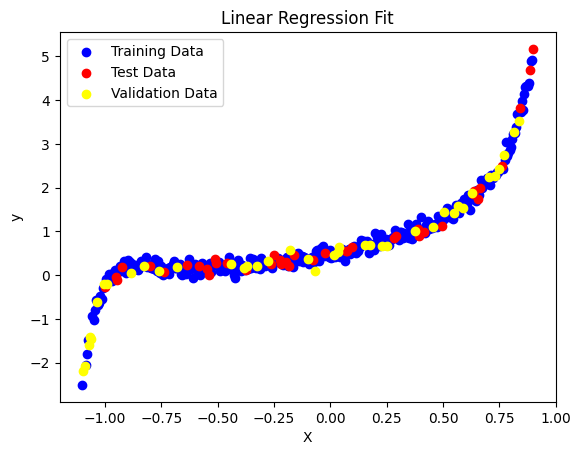

In [56]:
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='red', label='Test Data')
plt.scatter(X_val, y_val, color='yellow', label='Validation Data')

plt.legend()
plt.title('Linear Regression Fit')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [57]:
# Instantiate the LinearRegression model
model = LinearRegression(degree=1)

# Fit the model
model.fit(X_train, y_train)

train_mse, train_std_dev, train_variance = model.calculate_metrics(X_train, y_train)
test_mse, test_std_dev, test_variance = model.calculate_metrics(X_test, y_test)
val_mse, val_std_dev, val_variance = model.calculate_metrics(X_val, y_val)
# Predict and evaluate on training set

print(f"Train MSE: {train_mse}, Variance: {train_variance}, Standard Deviation: {train_std_dev}")
print(f"Test MSE: {test_mse}, Variance: {test_variance}, Standard Deviation: {test_std_dev}")
print(f"Val MSE: {val_mse}, Variance: {val_variance}, Standard Deviation: {val_std_dev}")



Train MSE: 0.3282343676552325, Variance: 0.32823292439382545, Standard Deviation: 0.5729161582586282
Test MSE: 0.562687671475741, Variance: 0.5533984474449066, Standard Deviation: 0.7439075530231607
Val MSE: 0.3676089467314013, Variance: 0.3467848976891118, Standard Deviation: 0.5888844518996166


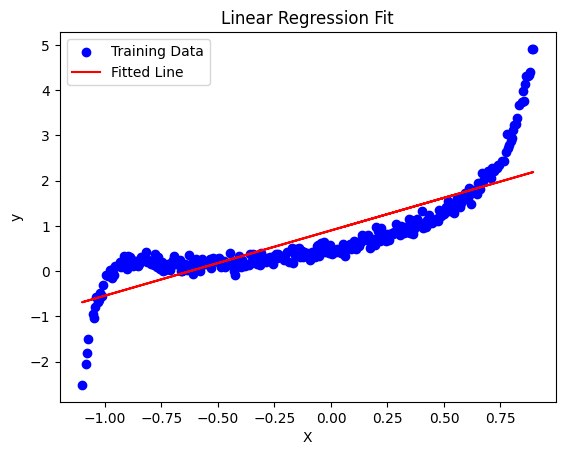

In [58]:
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.plot(X_train, model.predict(X_train), color='red', label='Fitted Line')
plt.legend()
plt.title('Linear Regression Fit')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

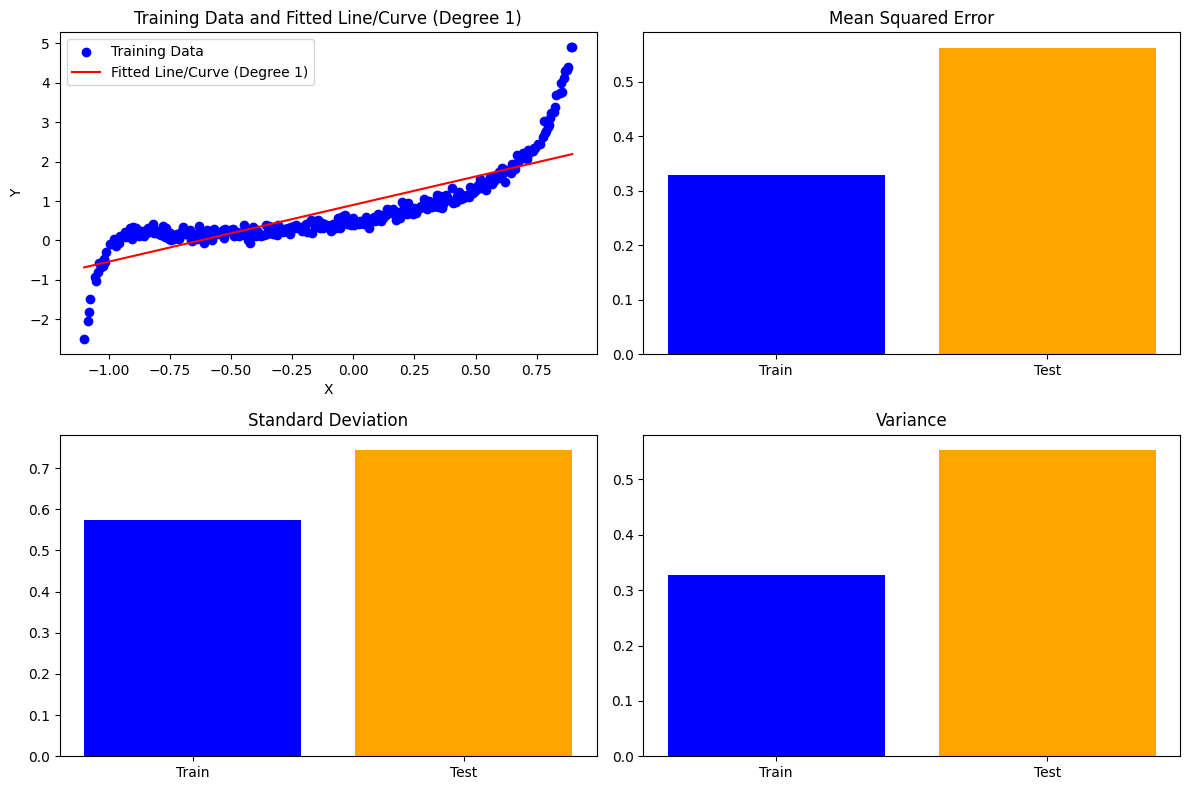

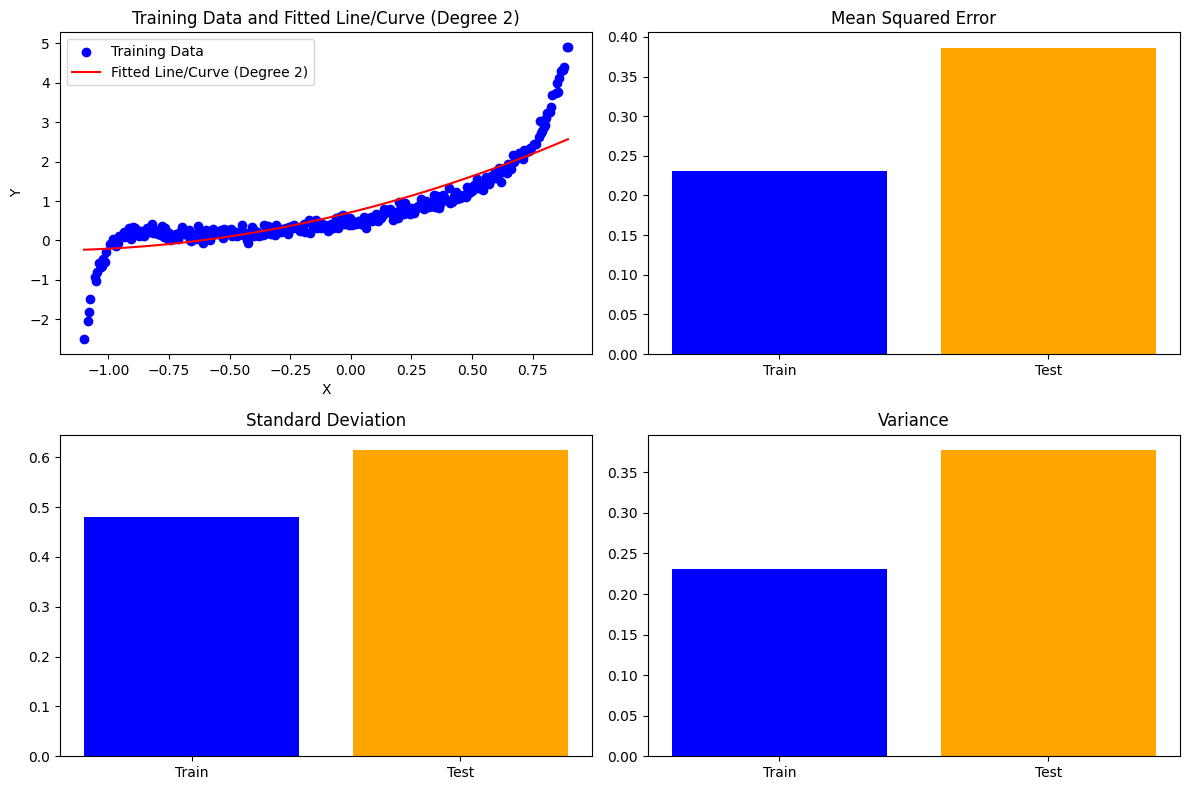

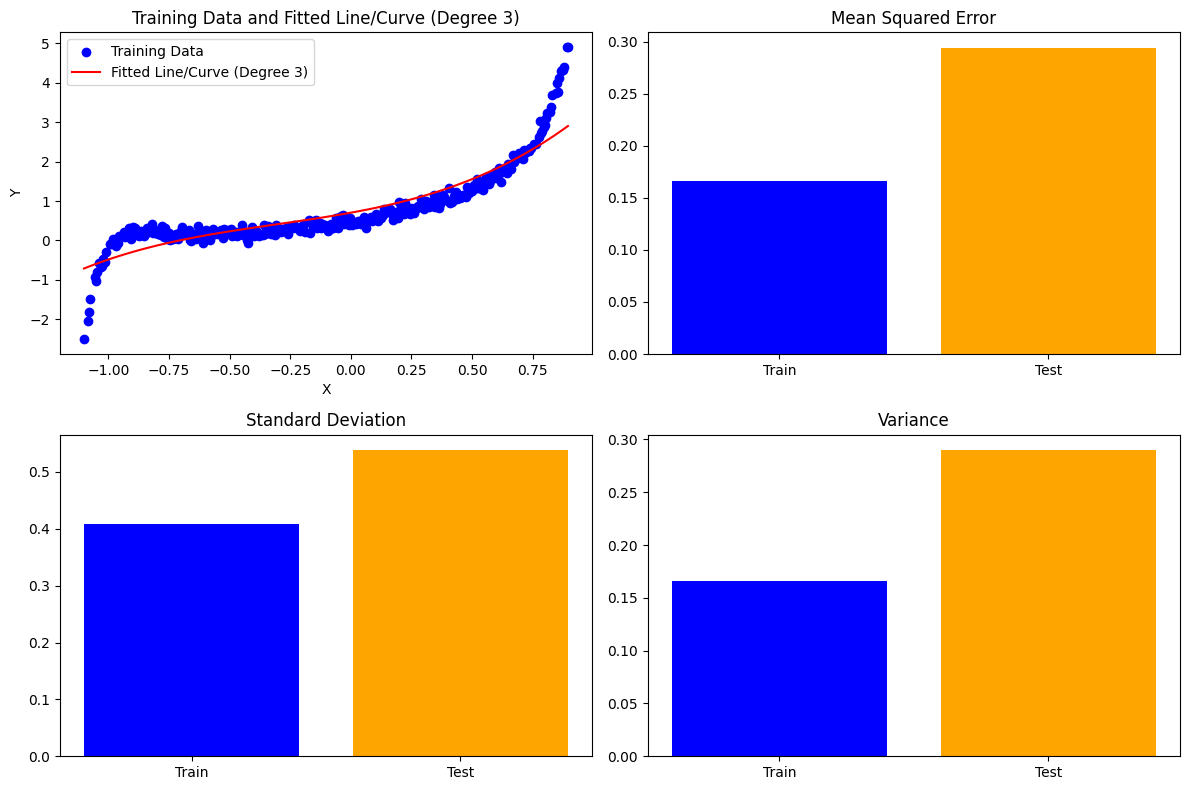

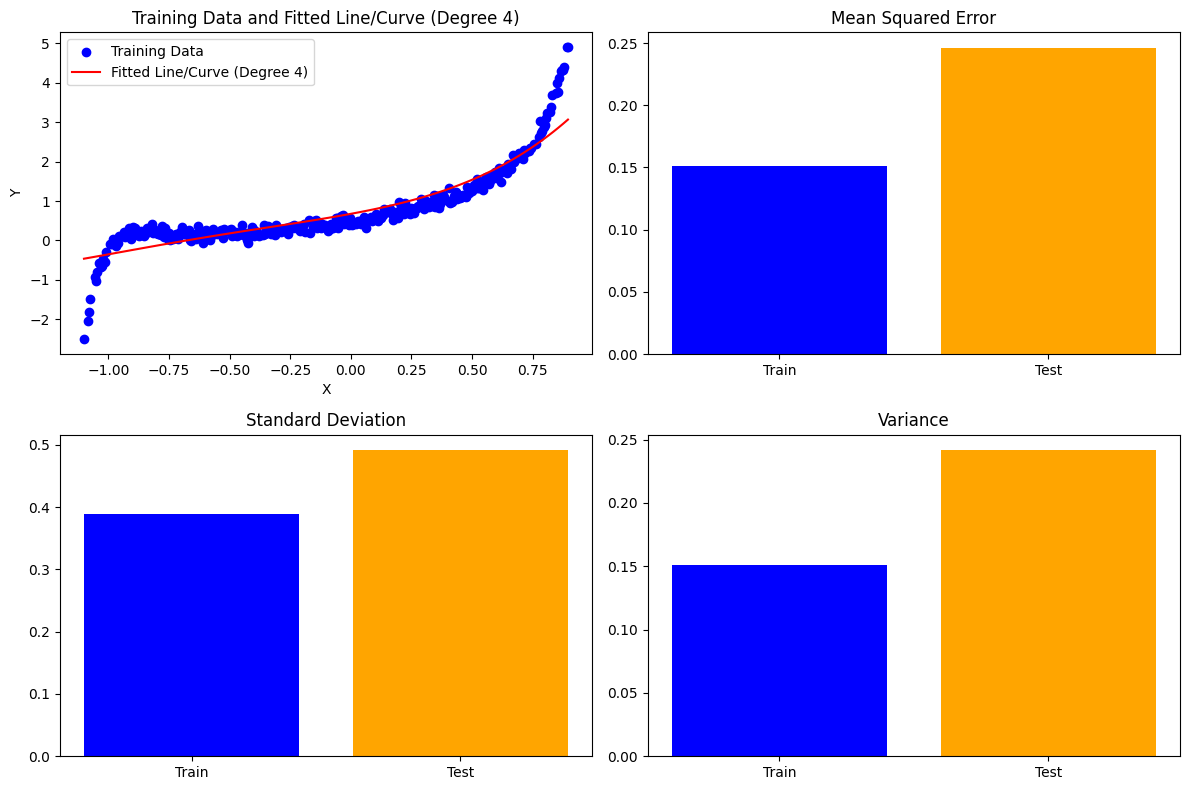

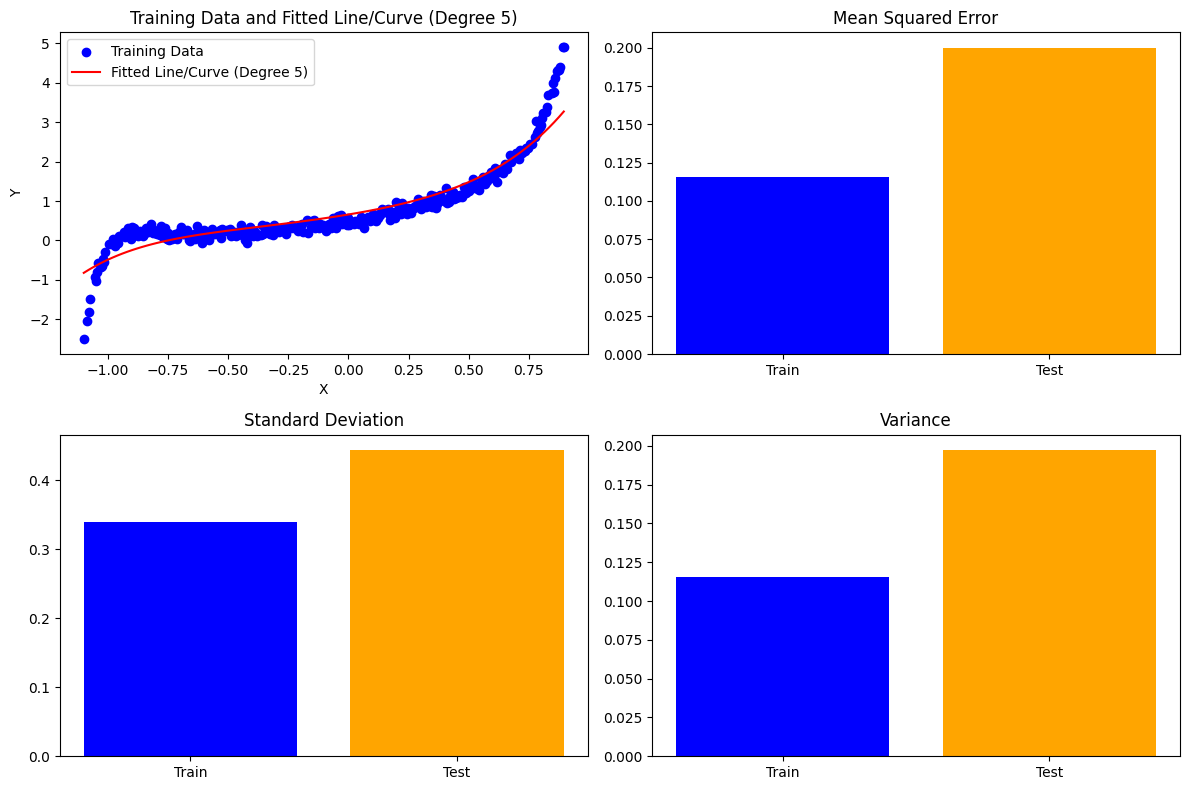

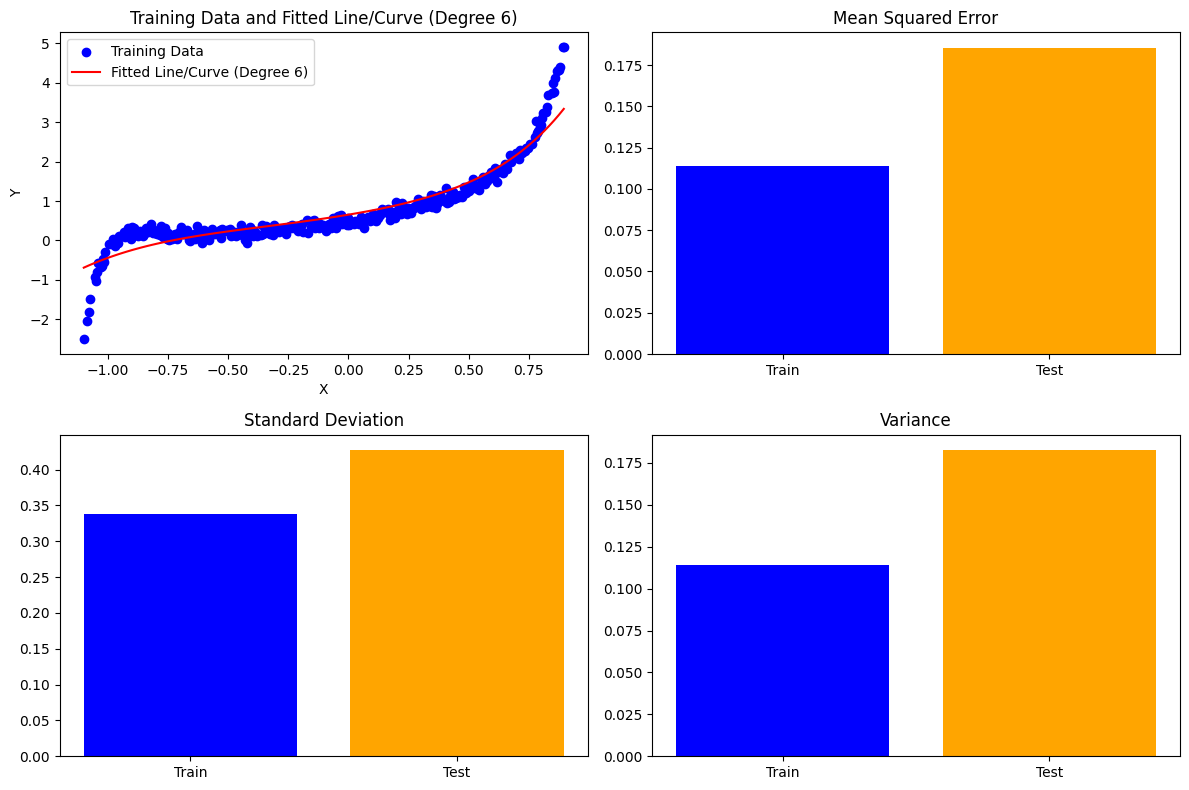

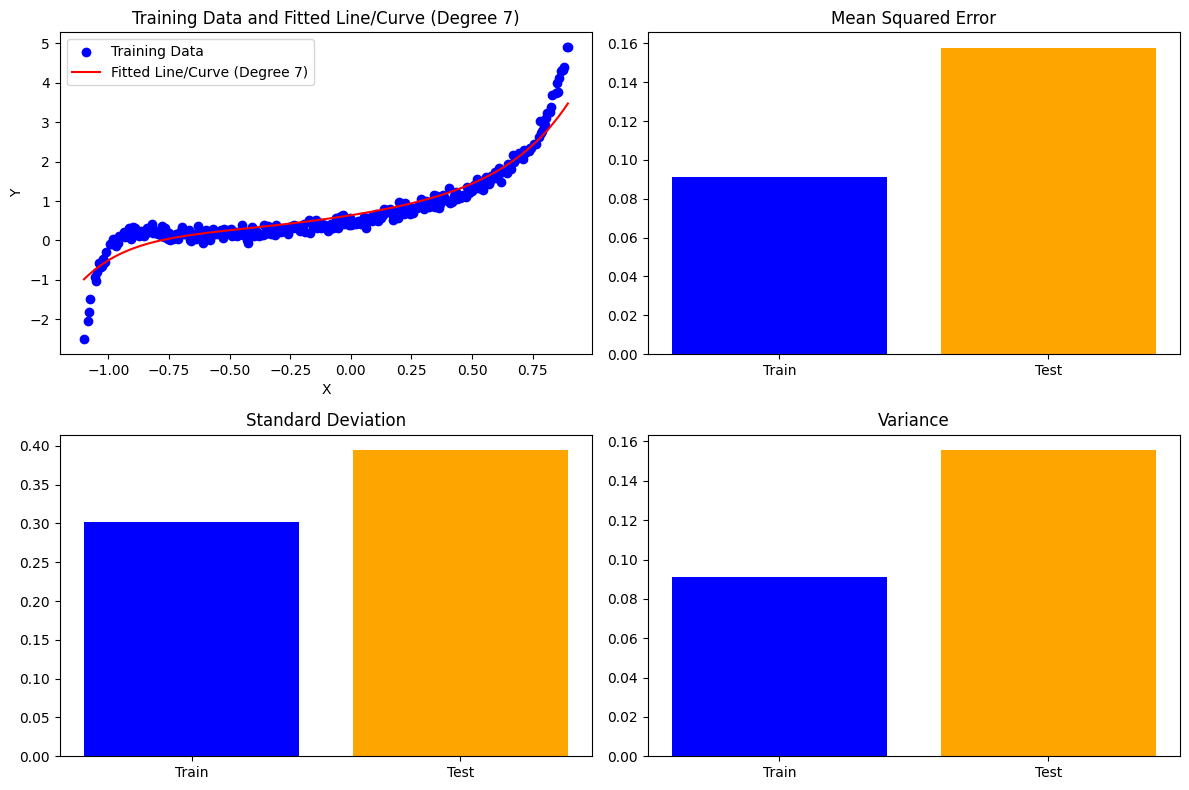

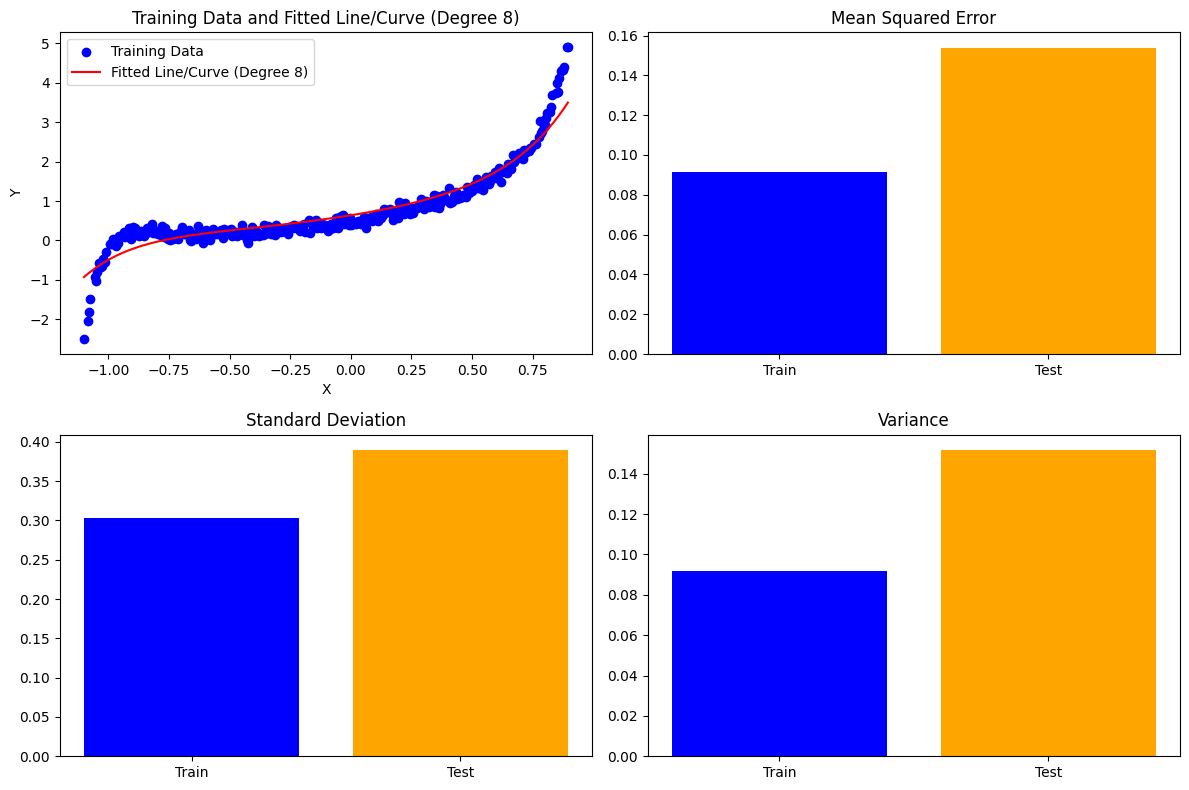

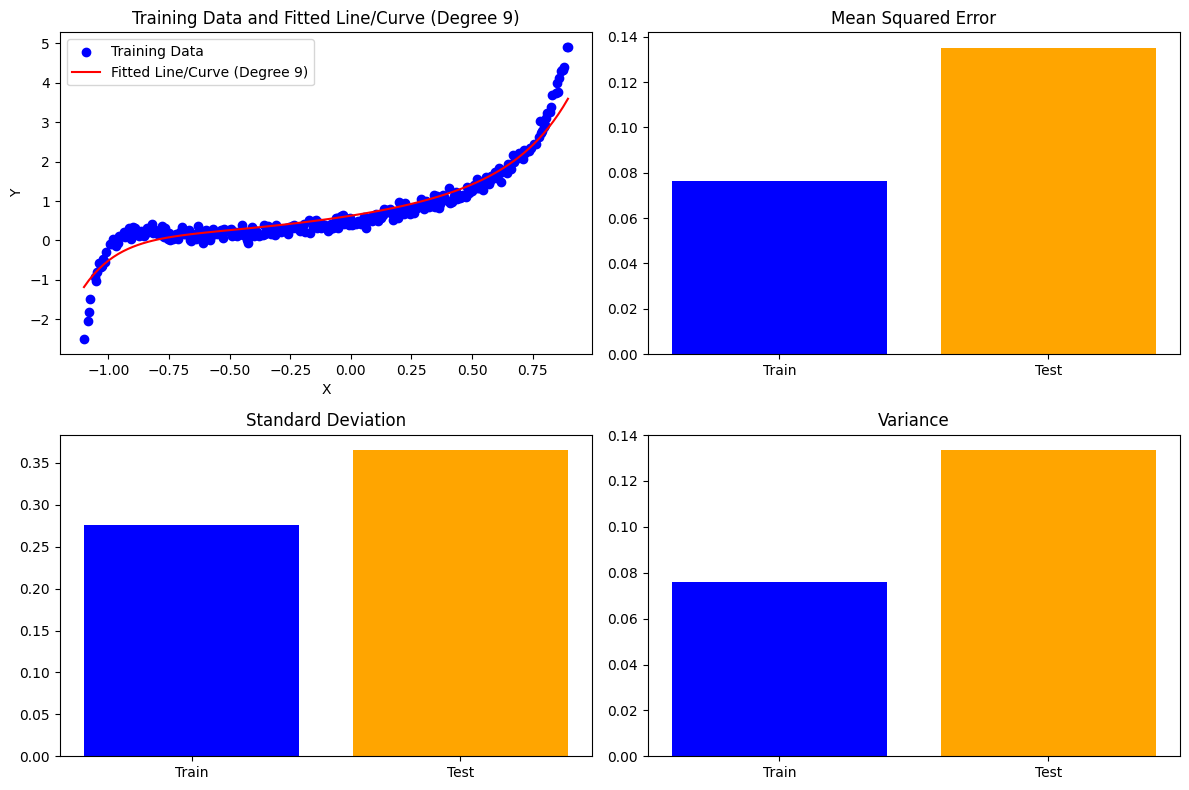

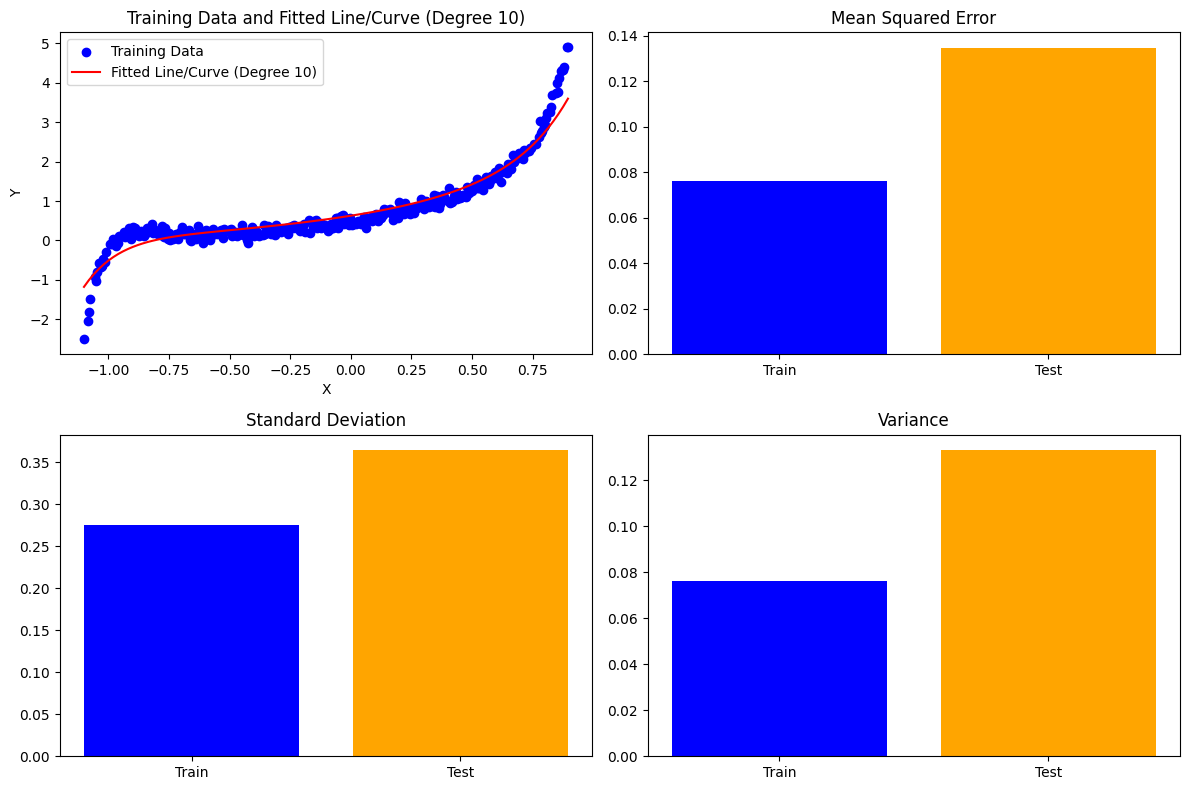

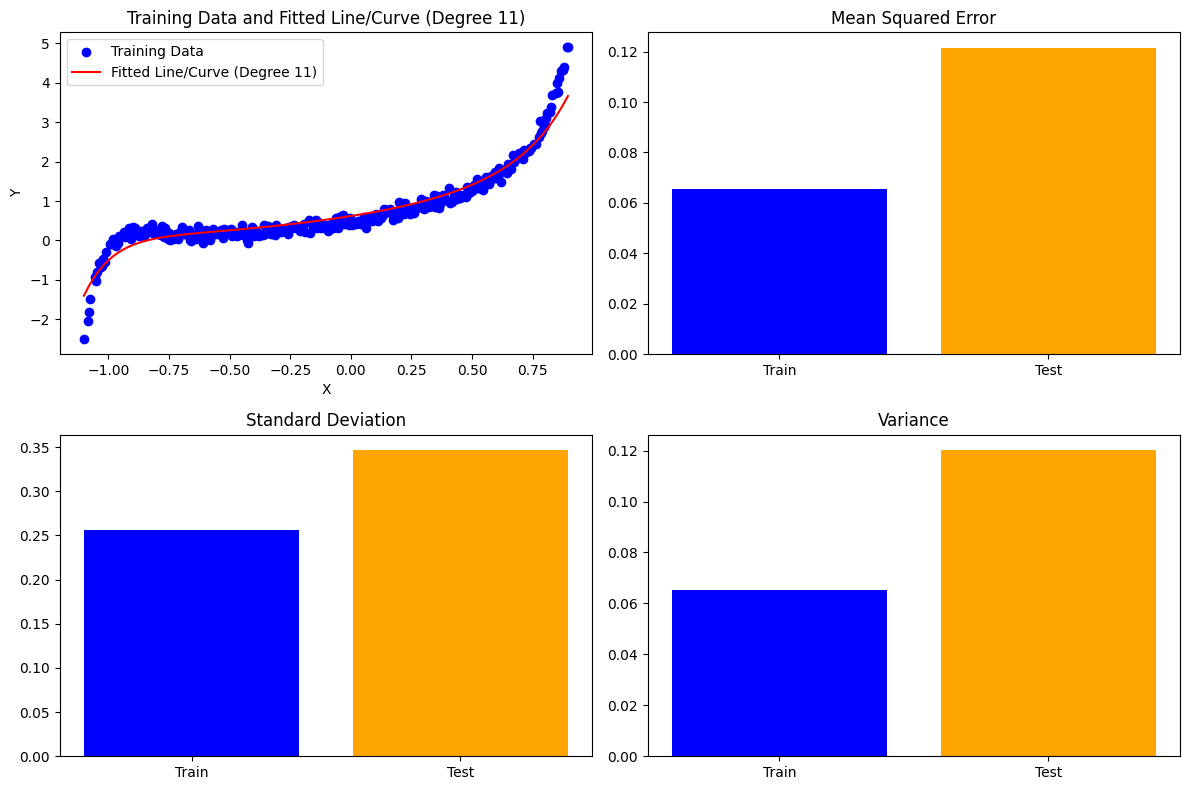

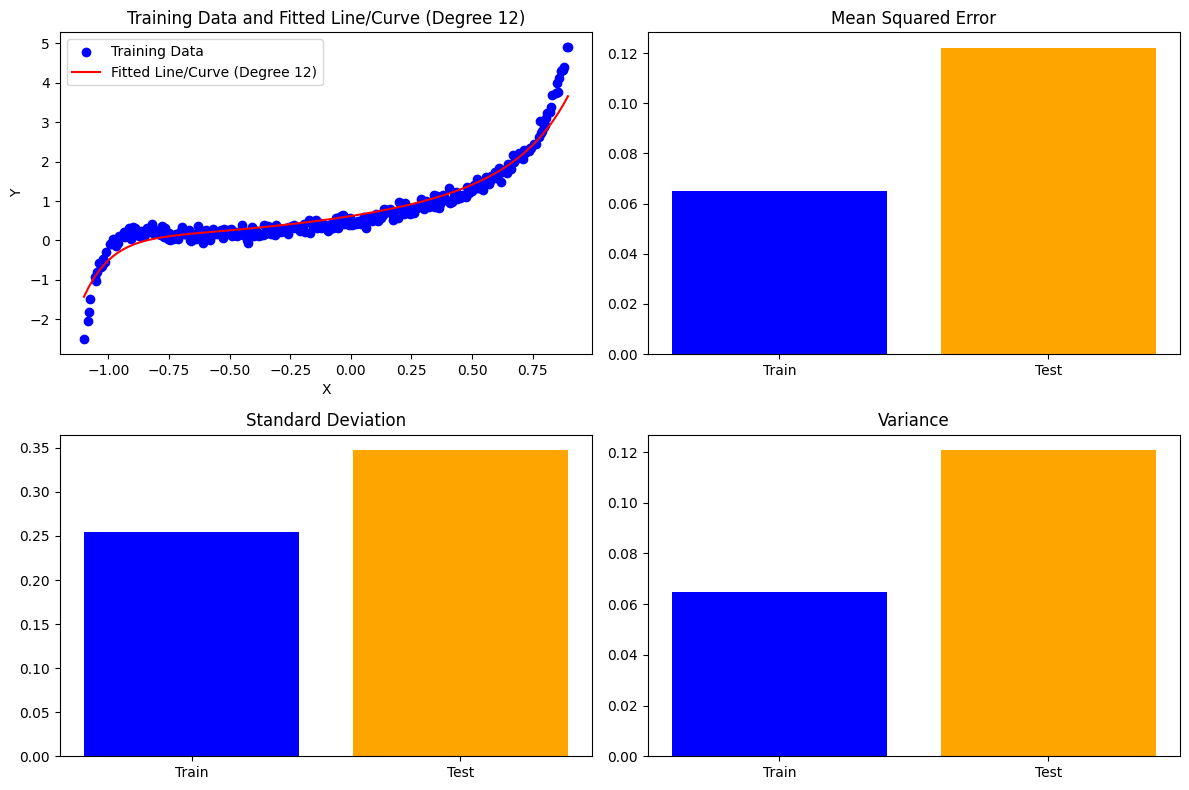

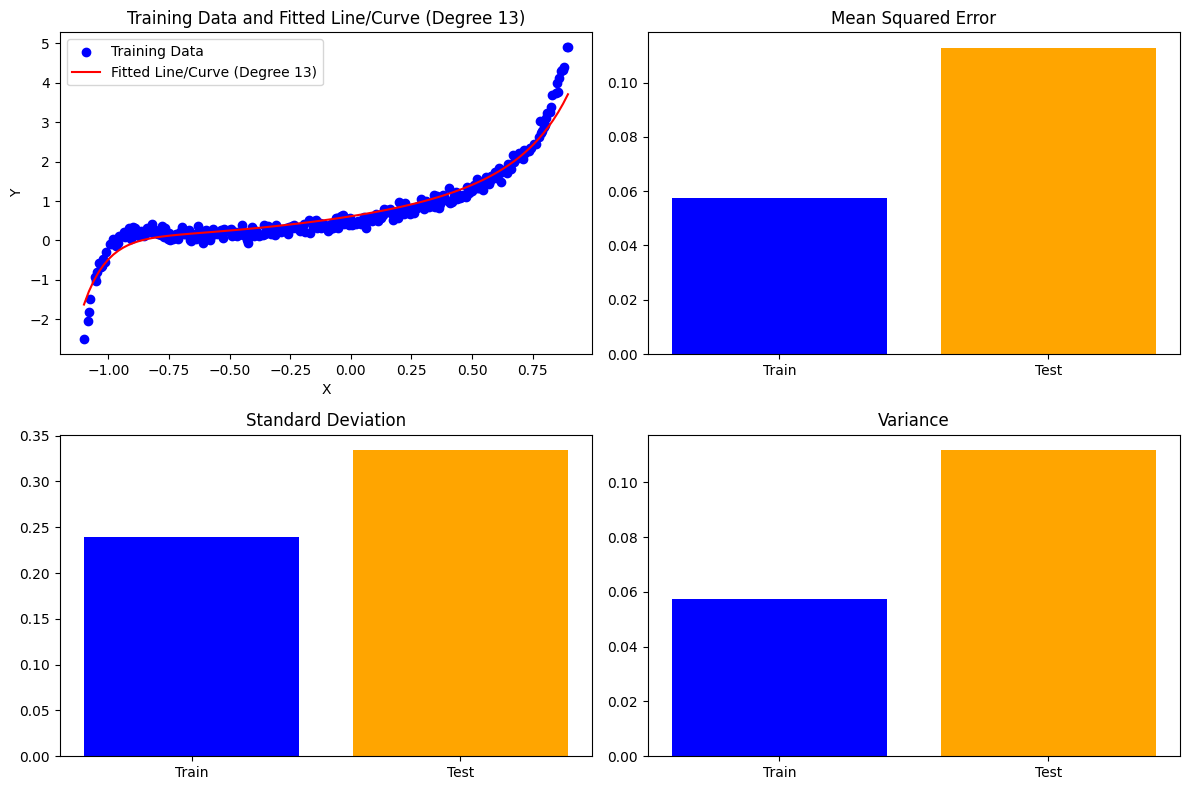

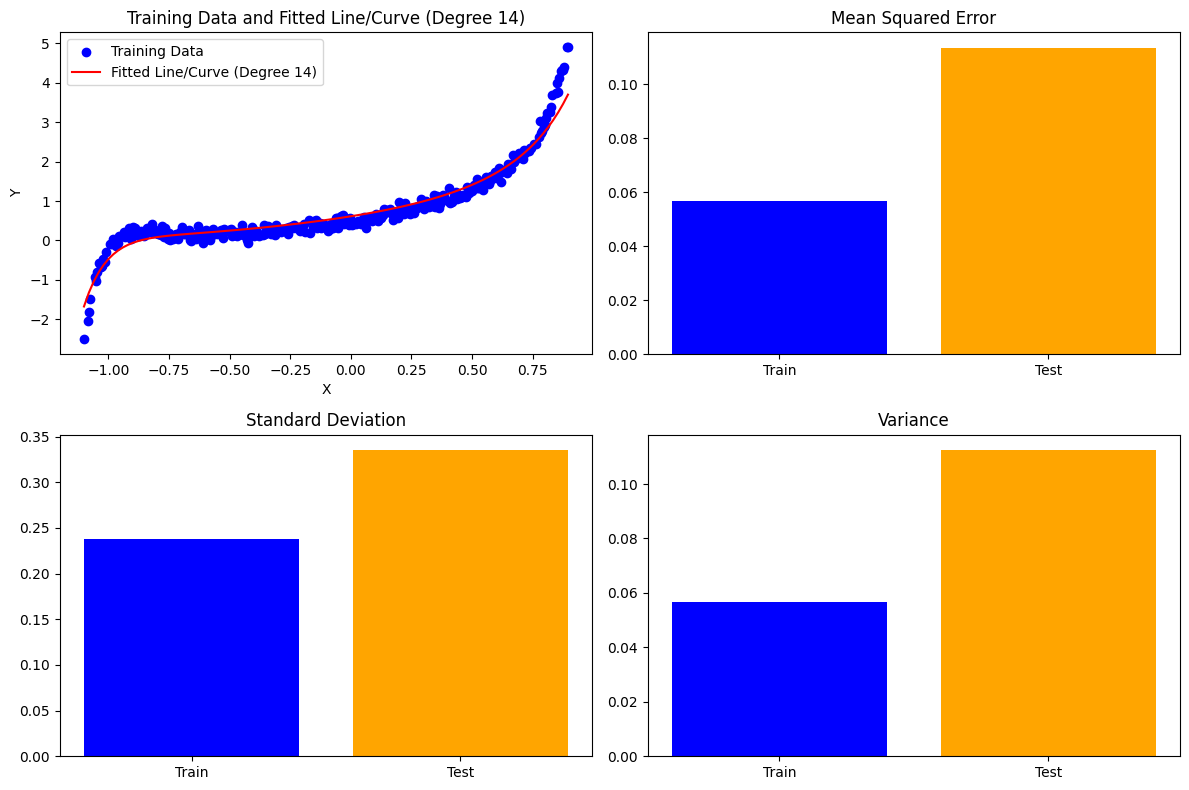

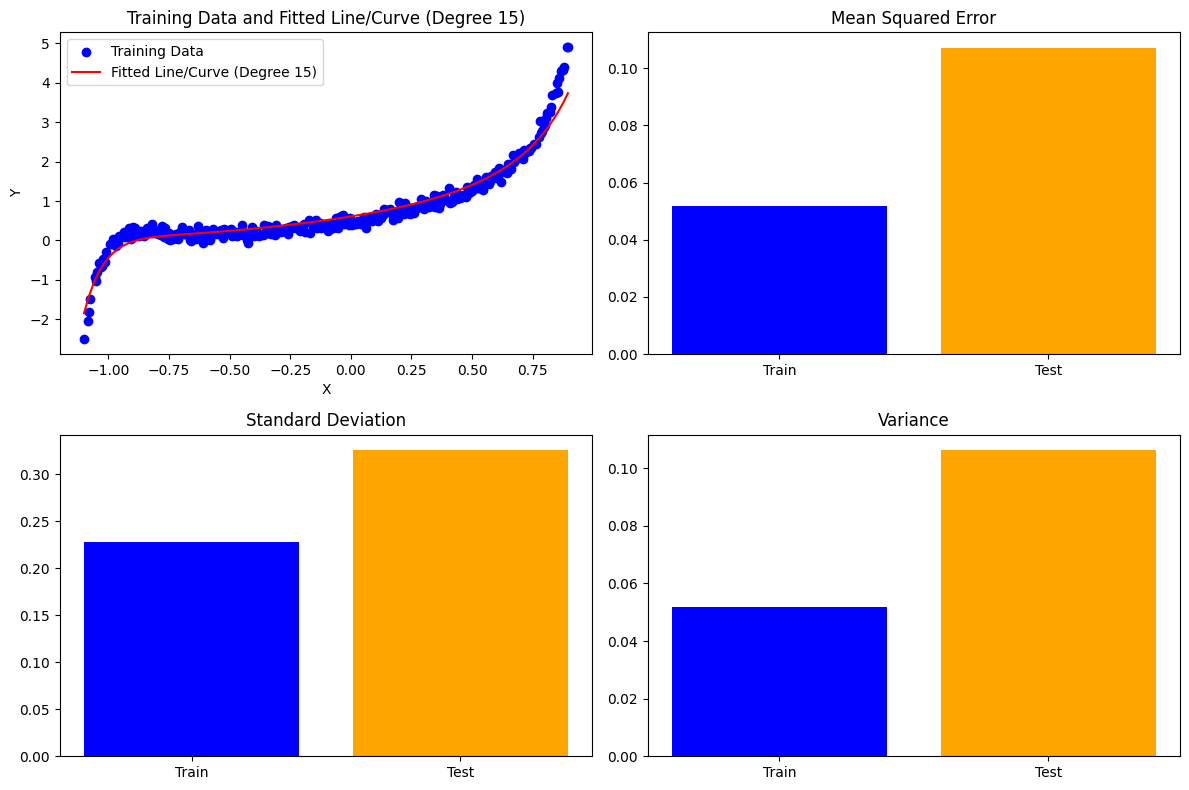

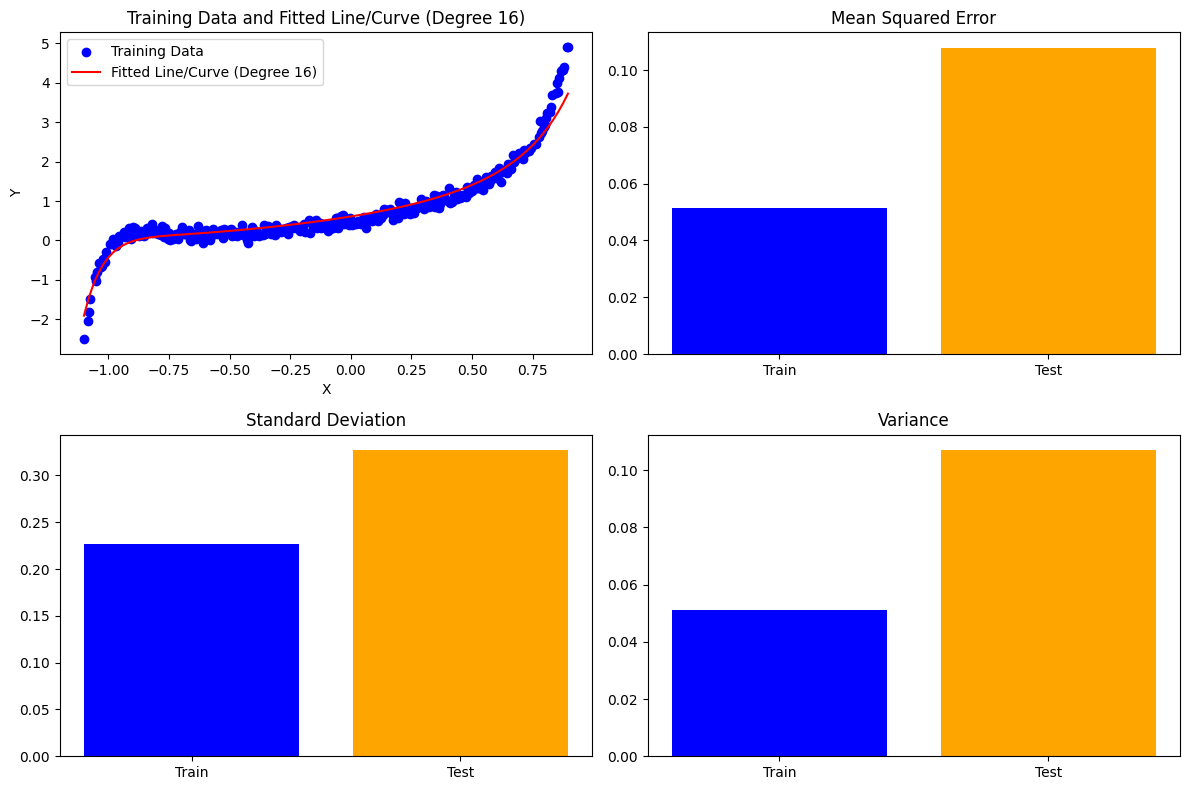

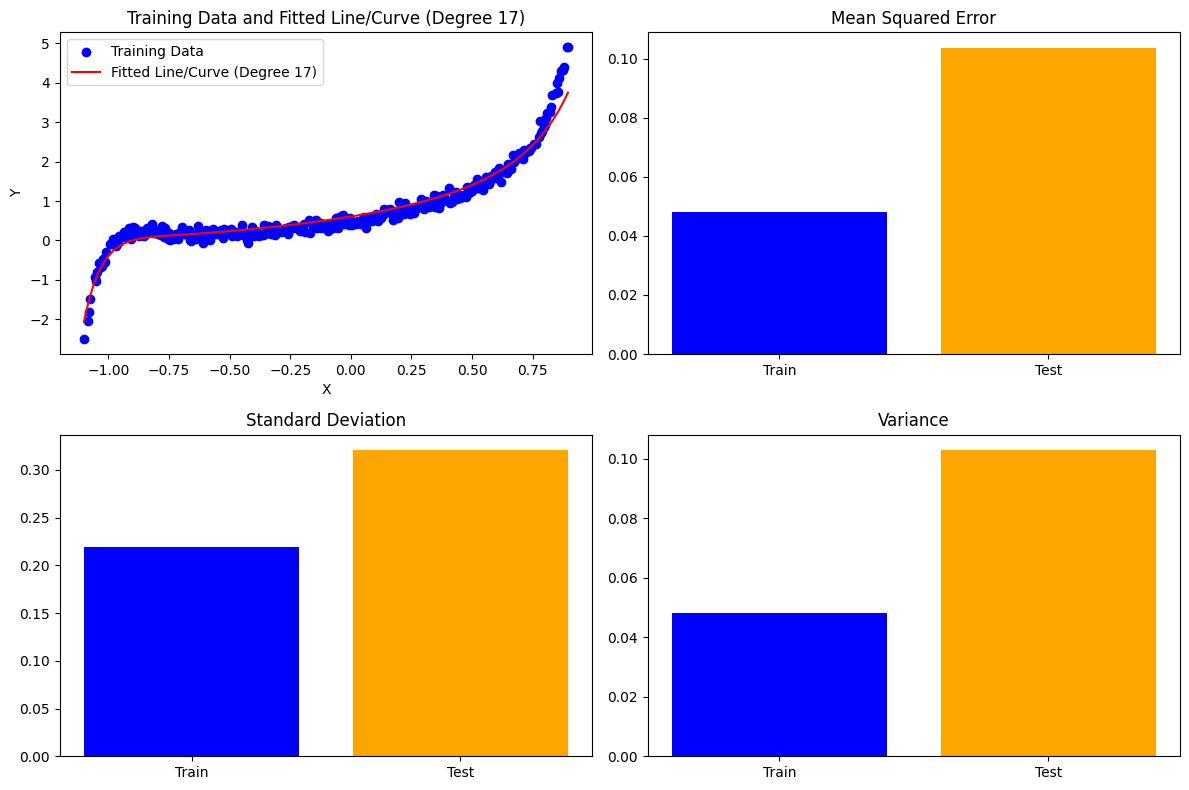

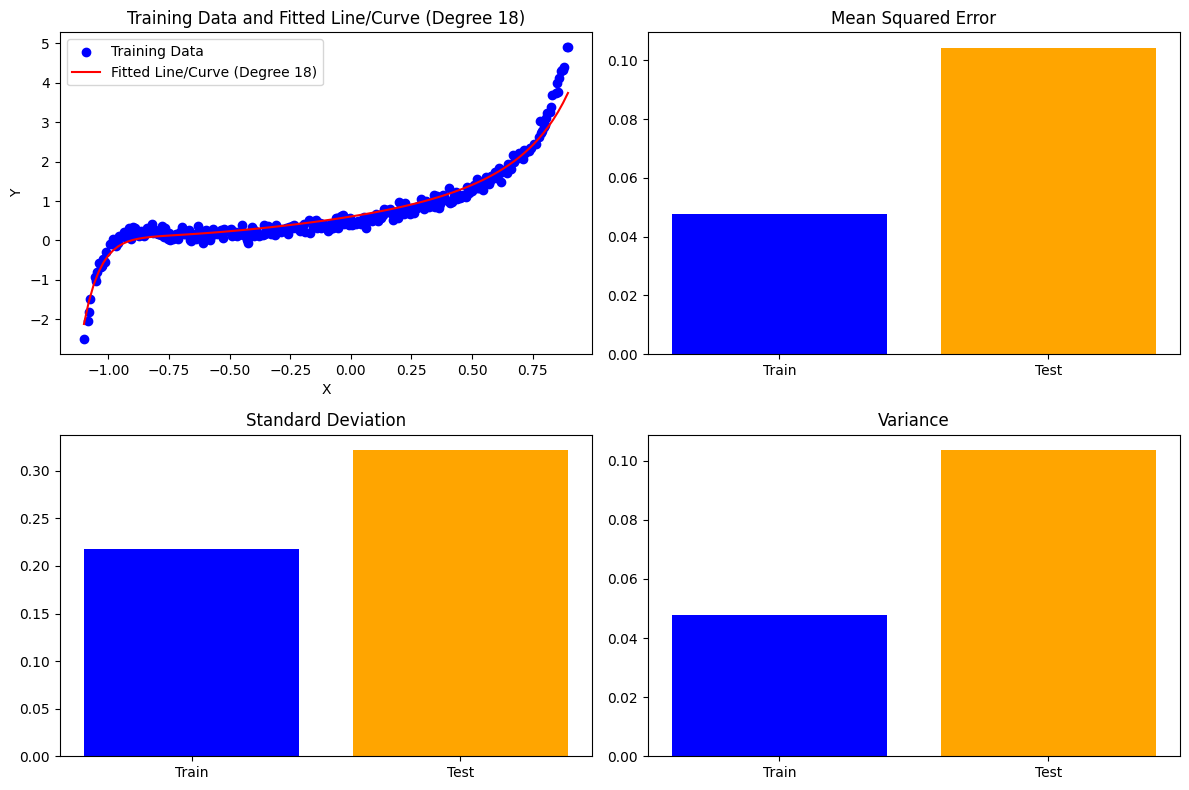

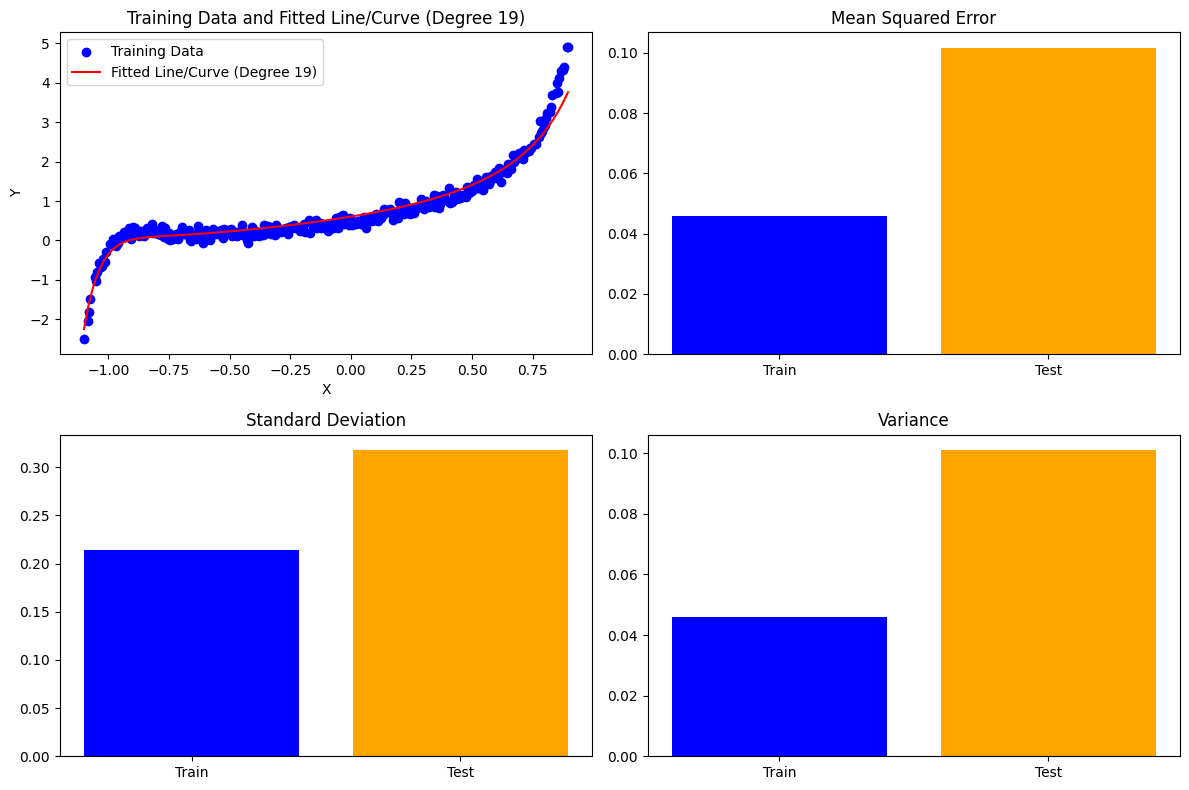

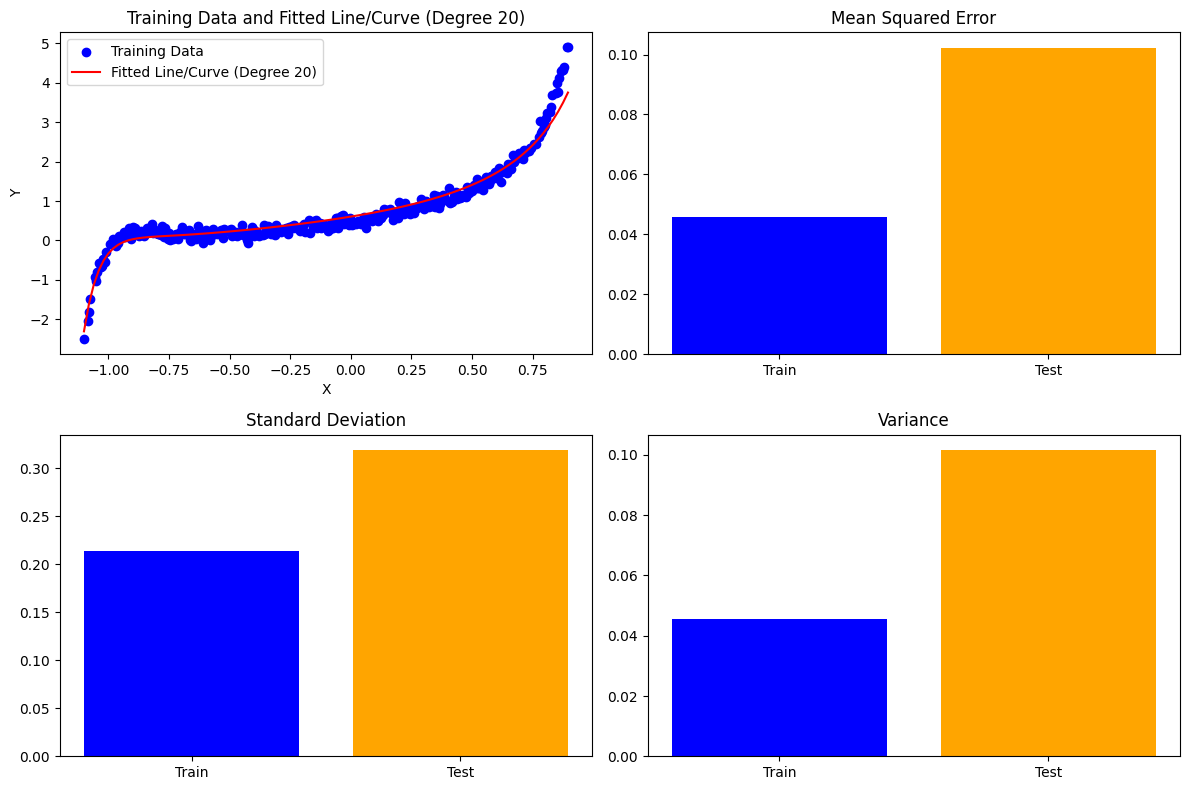

In [59]:
def plot_for_degree(degree, X_train, y_train, X_test, y_test, iteration):
    model = LinearRegression(degree=degree)
    model.fit(X_train, y_train)
    
    mse_train, std_dev_train, var_train = model.calculate_metrics(X_train, y_train)
    mse_test, std_dev_test, var_test = model.calculate_metrics(X_test, y_test)
    

    plt.figure(figsize=(12, 8))
    
    plt.subplot(2, 2, 1)
    plt.scatter(X_train, y_train, color='blue', label='Training Data')
    X_range = np.linspace(X_train.min(), X_train.max(), 100)
    plt.plot(X_range, model.predict(X_range), color='red', label=f'Fitted Line/Curve (Degree {degree})')
    plt.title(f'Training Data and Fitted Line/Curve (Degree {degree})')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    
    plt.subplot(2, 2, 2)
    plt.bar(['Train', 'Test'], [mse_train, mse_test], color=['blue', 'orange'])
    plt.title('Mean Squared Error')
    
    plt.subplot(2, 2, 3)
    plt.bar(['Train', 'Test'], [std_dev_train, std_dev_test], color=['blue', 'orange'])
    plt.title('Standard Deviation')

    plt.subplot(2, 2, 4)
    plt.bar(['Train', 'Test'], [var_train, var_test], color=['blue', 'orange'])
    plt.title('Variance')
    
    plt.tight_layout()
    plt.show()
   
    # plt.savefig(f"figures/plot_degree_{degree}_iteration_{iteration}.jpg")
    plt.close()

for degree in range(1, 21):
    plot_for_degree(degree, X_train, y_train, X_test, y_test, degree)


In [66]:
from PIL import Image
import glob

def create_gif(image_folder, output_gif_path, duration_per_frame=200):
    # Collect all image paths
    image_paths = sorted(glob.glob(f"{image_folder}/*.png"))
    
    # Initialize an empty list to store the images
    frames = [Image.open(image_path) for image_path in image_paths]
    
    # Save frames as an animated GIF
    frames[0].save(output_gif_path,
                   save_all=True,
                   append_images=frames[1:],
                   duration=duration_per_frame,
                   loop=0,
                   optimize=True)

# Create GIF from saved plots
create_gif('figures/deg12', 'figures_gif/deg12.gif')
